In [1]:
#!pip install pmdarima

In [5]:
#!pip uninstall -y pmdarima numpy
#!pip install pmdarima numpy==1.26.4

Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: numpy 2.3.1
Uninstalling numpy-2.3.1:
  Successfully uninstalled numpy-2.3.1
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
#!pip uninstall -y pmdarima numpy
#!pip install numpy --upgrade
#!pip install numpy==1.26.4 --force-reinstall --no-cache-dir


Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 55.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 221.2 MB/s eta 0:00:00
ERROR: Operation cancelled by user
^C


In [2]:
#!pip install prophet

In [3]:
#!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


# Imports

In [2]:
# Streamlit and general-purpose imports
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from joblib import load

# Visualization
import matplotlib.pyplot as plt

# Time Series Analysis and Forecasting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from prophet import Prophet

# Machine Learning
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# Deep Learning
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Data Loading & Preprocessing

In [76]:
# Load data
df = pd.read_csv('project_dataset.csv')
df

,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,0,1.0,24924.50,42.31,2.572,211.096358,8.106
1,2010-02-05,0,26.0,11737.12,42.31,2.572,211.096358,8.106
2,2010-02-05,0,17.0,13223.76,42.31,2.572,211.096358,8.106
3,2010-02-05,0,45.0,37.44,42.31,2.572,211.096358,8.106
4,2010-02-05,0,28.0,1085.29,42.31,2.572,211.096358,8.106
...,...,...,...,...,...,...,...,...
10239,2012-10-26,0,13.0,38512.48,69.16,3.506,223.444251,6.573
10240,2012-10-26,0,93.0,66622.89,69.16,3.506,223.444251,6.573
10241,2012-10-26,0,48.0,3341.00,69.16,3.506,223.444251,6.573
10242,2012-10-26,0,95.0,117375.38,69.16,3.506,223.444251,6.573


In [77]:
df = df[df['Dept'] == 24].copy()
df

,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
56,2010-02-05,0,24.0,8272.90,42.31,2.572,211.096358,8.106
111,2010-02-12,1,24.0,8050.24,38.51,2.548,211.242170,8.106
165,2010-02-19,0,24.0,7366.70,39.93,2.514,211.289143,8.106
226,2010-02-26,0,24.0,5630.82,46.63,2.561,211.319643,8.106
314,2010-03-05,0,24.0,6885.90,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
9934,2012-09-28,0,24.0,4364.69,76.08,3.666,222.981658,6.908
10019,2012-10-05,0,24.0,7322.07,68.55,3.617,223.181477,6.573
10060,2012-10-12,0,24.0,7733.20,62.99,3.601,223.381296,6.573
10141,2012-10-19,0,24.0,5355.52,67.97,3.594,223.425723,6.573


In [78]:
# Convert to datetime and set index then sort
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df = df.asfreq('W-FRI')

In [79]:
df

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,0,24.0,8272.90,42.31,2.572,211.096358,8.106
2010-02-12,1,24.0,8050.24,38.51,2.548,211.242170,8.106
2010-02-19,0,24.0,7366.70,39.93,2.514,211.289143,8.106
2010-02-26,0,24.0,5630.82,46.63,2.561,211.319643,8.106
2010-03-05,0,24.0,6885.90,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,0,24.0,4364.69,76.08,3.666,222.981658,6.908
2012-10-05,0,24.0,7322.07,68.55,3.617,223.181477,6.573
2012-10-12,0,24.0,7733.20,62.99,3.601,223.381296,6.573


In [80]:
# Rename target column
df.rename(columns={'Weekly_Sales': 'y'}, inplace=True)

In [81]:
# Fill missing values in regressors
exog_vars = ['Fuel_Price', 'CPI', 'Unemployment', 'Temperature']
df[exog_vars] = df[exog_vars]


In [82]:
df.isna().sum()

,0
IsHoliday,0
Dept,0
y,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


# Exploratory Data Analysis (EDA)

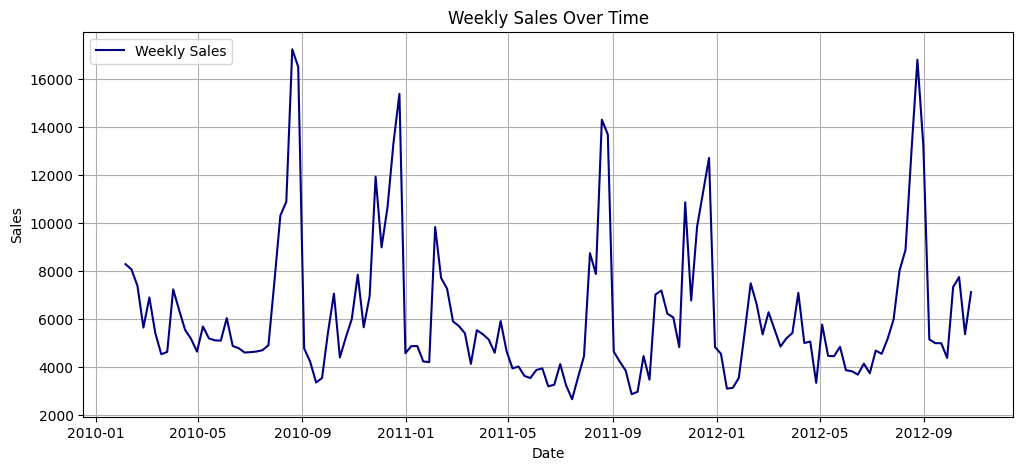

In [83]:
# Plot series
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['y'], label='Weekly Sales', color='navy')
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


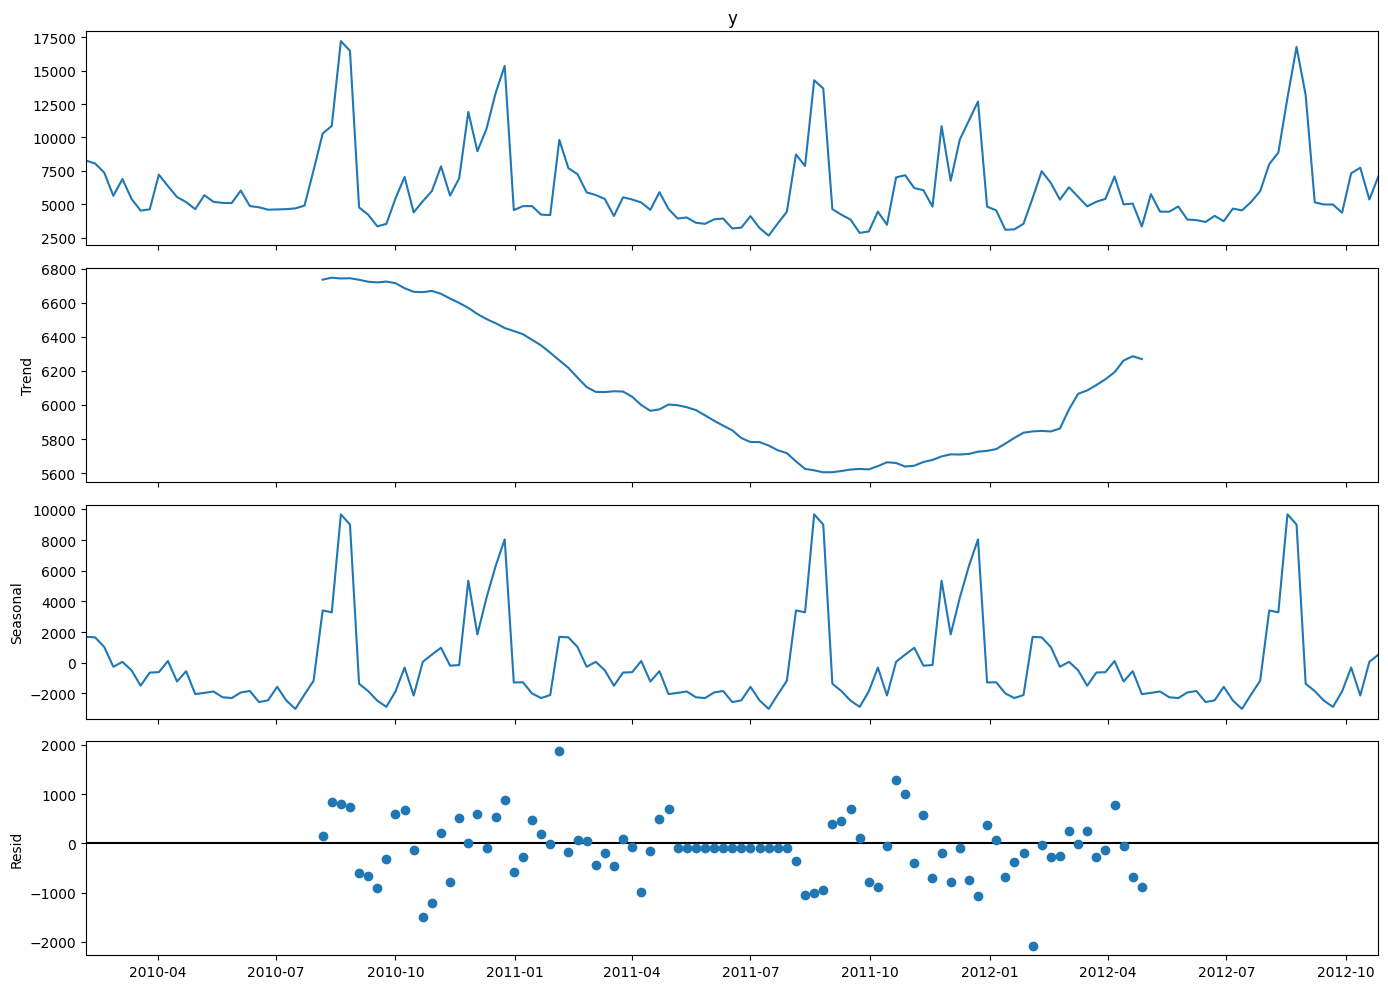

In [12]:
# Perform seasonal decomposition (using a period of 52 weeks for annual seasonality)
decomposition = seasonal_decompose(df['y'], model='additive', period=52)

# Plot the decomposed components
plt.rcParams.update({'figure.figsize': (14, 10)})
decomposition.plot()
plt.show()

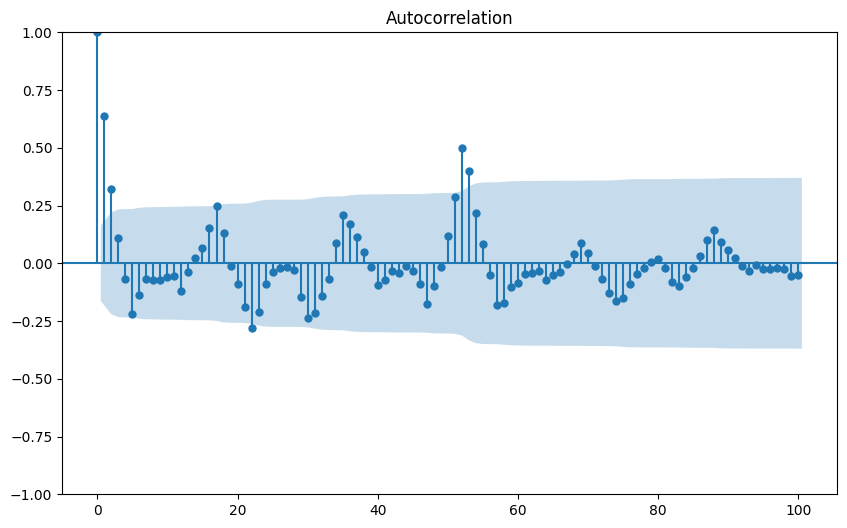

In [13]:
# Plot the autocorrelation (ACF) of revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['y'], lags = 100, ax = ax)
plt.show()

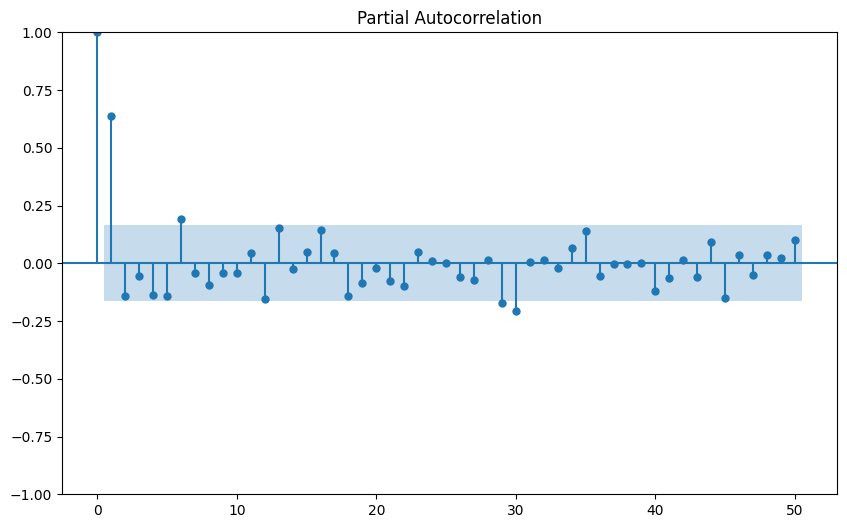

In [14]:
# Plot the partial autocorrelation (PACF) of revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['y'], lags = 50, ax = ax)
plt.show()

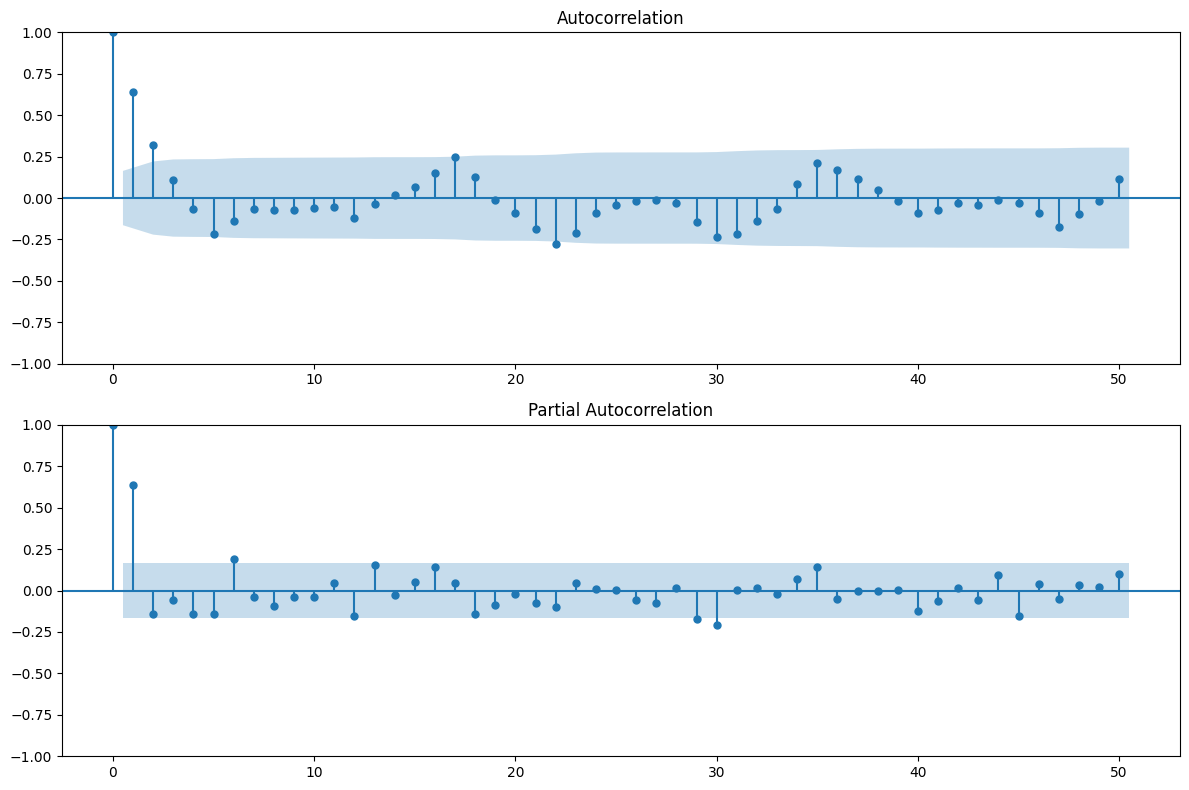

In [15]:
# ACF / PACF
fig, ax = plt.subplots(2, figsize=(12, 8))
plot_acf(df['y'], lags=50, ax=ax[0])
plot_pacf(df['y'], lags=50, ax=ax[1])
plt.tight_layout()
plt.show()

### check stationarity

Time series models like ARIMA, SARIMA, and SARIMAX assume that the data is stationary , which means:

The mean and variance are constant over time.
There's no trend or seasonality .
If your original series (y) has a trend (e.g., increasing or decreasing pattern), it's not stationary , and these models won't work well.

In [16]:
def adf_test(series):
    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

adf_test(df['y'])


ADF Statistic: -4.213460305119998
p-value: 0.0006251714372072064
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


Now p-value < 0.05 and ADF stat < critical values → Stationary!

In [17]:
test_size = 30  # Last 30 weeks for testing
train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

exog_train = train[exog_vars]
exog_test = test[exog_vars]

# Modeling Sections

In [18]:
# Re-define function to assess model performance
def model_assessment(train, test, predictions, chart_title):
    plt.figure(figsize=(10, 4))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, predictions, label="Forecast")
    plt.title(f"Train, Test and Predictions with {chart_title}")
    plt.legend()
    plt.show()


In [19]:
model_arima = auto_arima(train['y'], seasonal=False, stepwise=True)
preds_arima = model_arima.predict(n_periods=test_size)

# Evaluate
mae_arima = mean_absolute_error(test['y'], preds_arima)
rmse_arima = np.sqrt(mean_squared_error(test['y'], preds_arima))
print(f"ARIMA - MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

ARIMA - MAE: 2190.07, RMSE: 3071.12


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


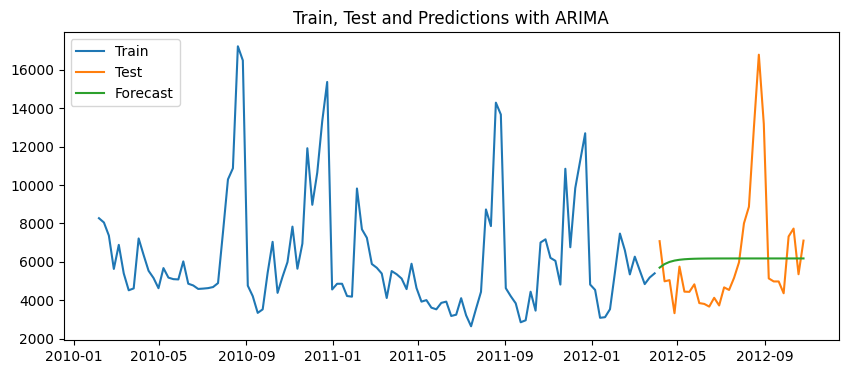

In [20]:
# Model assessment
model_assessment(train['y'], test['y'], preds_arima, "ARIMA")

In [21]:
model_sarima = auto_arima(train['y'], seasonal=True, m=52, stepwise=True)
preds_sarima = model_sarima.predict(n_periods=test_size)

# Evaluate
mae_sarima = mean_absolute_error(test['y'], preds_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test['y'], preds_sarima))
print(f"SARIMA - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

SARIMA - MAE: 1834.45, RMSE: 2549.71


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


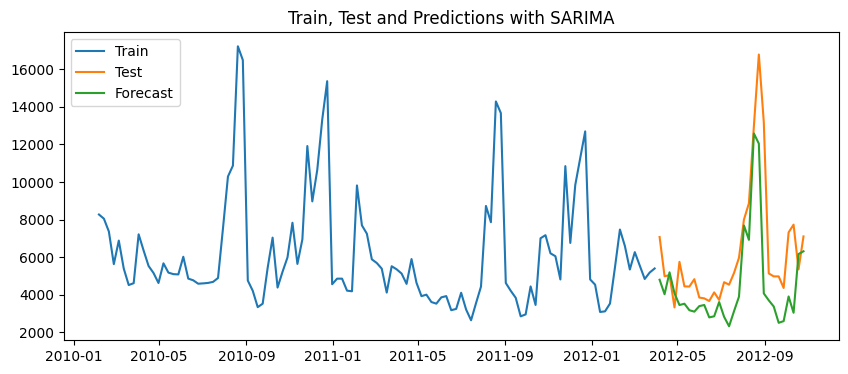

In [22]:
# Model assessment
model_assessment(train['y'], test['y'], preds_sarima, "SARIMA")

In [23]:
model_sarimax = auto_arima(y=train['y'], X=exog_train, seasonal=True, m=52)
preds_sarimax = model_sarimax.predict(n_periods=test_size, X=exog_test)

# Evaluate
mae_sarimax = mean_absolute_error(test['y'], preds_sarimax)
rmse_sarimax = np.sqrt(mean_squared_error(test['y'], preds_sarimax))
print(f"SARIMAX - MAE: {mae_sarimax:.2f}, RMSE: {rmse_sarimax:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

SARIMAX - MAE: 2070.09, RMSE: 2980.89


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


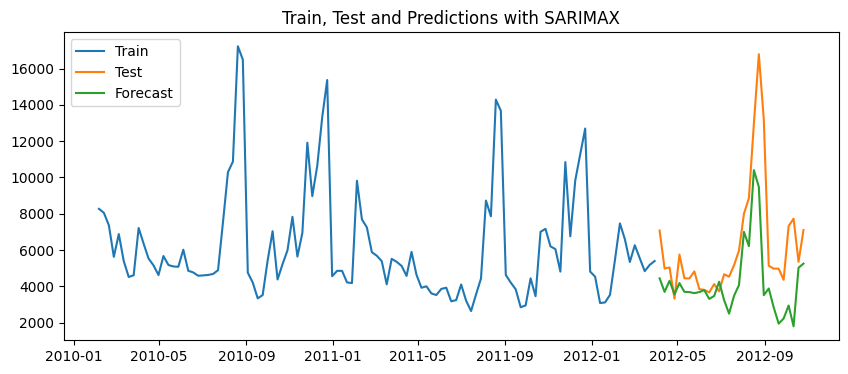

In [24]:
# Model assessment
model_assessment(train['y'], test['y'], preds_sarimax, "SARIMAX")

In [25]:
model_hw = ExponentialSmoothing(train['y'], trend='mul', seasonal='mul', seasonal_periods=52)
fit_hw = model_hw.fit()
preds_hw = fit_hw.forecast(steps=test_size)

# Evaluate
mae_hw = mean_absolute_error(test['y'], preds_hw)
rmse_hw = np.sqrt(mean_squared_error(test['y'], preds_hw))
print(f"Holt-Winters - MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}")

Holt-Winters - MAE: 1439.96, RMSE: 2209.41


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


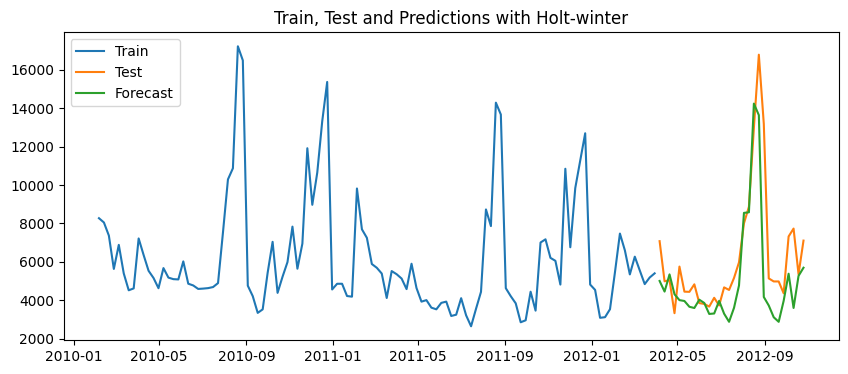

In [26]:
# Model assessment
model_assessment(train['y'], test['y'], preds_hw, "Holt-winter")

In [108]:
def create_lagged_features(data, lags=5):
    df = data.copy()
    for lag in range(1, lags + 1):
        df[f'Sales_Lag{lag}'] = df['y'].shift(lag)
    df.dropna(inplace=True)
    return df

exog_vars = ['IsHoliday', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
lagged_df = create_lagged_features(df[['y']])
final_df = lagged_df.join(df[exog_vars], how='inner')

train_ml = final_df.iloc[:len(train)]
test_ml = final_df.iloc[len(train):]

X_train = train_ml.drop(['y'], axis=1)
y_train = train_ml['y']
X_test = test_ml.drop(['y'], axis=1)
y_test = test_ml['y']

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
pred_rf = rf.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")


Random Forest - MAE: 1330.02, RMSE: 1945.40


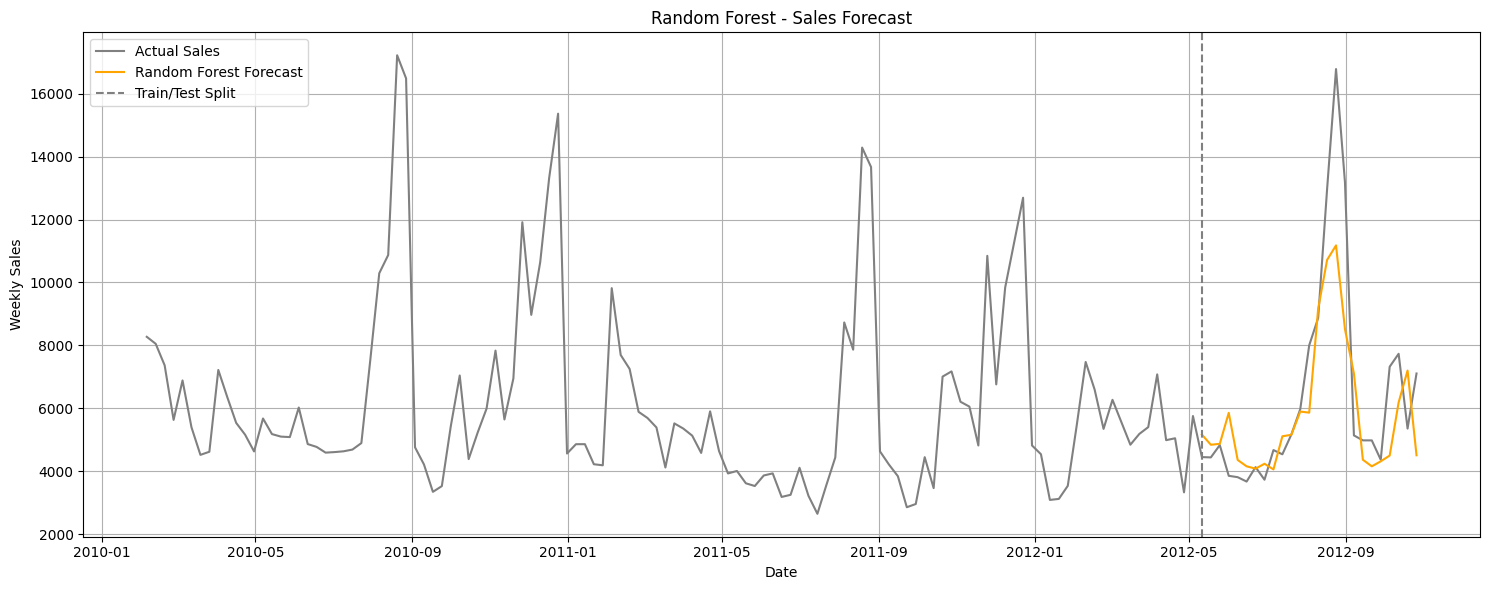

In [110]:
# Combine train and test actuals for full context
full_actual = pd.concat([train['y'], test['y']])
full_index = full_actual.index

# Build a series of predictions aligned with test set index
rf_preds_series = pd.Series(pred_rf, index=y_test.index)

# Plot
plt.figure(figsize=(15, 6))
plt.plot(full_index, full_actual, label='Actual Sales', color='grey')
plt.plot(rf_preds_series.index, rf_preds_series, label='Random Forest Forecast', color='orange')

plt.axvline(x=y_test.index[0], color='gray', linestyle='--', label='Train/Test Split')
plt.title("Random Forest - Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['y']])

SEQ_LENGTH = 10
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, SEQ_LENGTH)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32)

pred_lstm = model.predict(X_test)
pred_lstm = scaler.inverse_transform(pred_lstm)

# Evaluate
mae_lstm = mean_absolute_error(y_test, pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, pred_lstm))
print(f"LSTM - MAE: {mae_lstm:.2f}, RMSE: {rmse_lstm:.2f}")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0752
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0477
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0590
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0554
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0467
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0463
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0484
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0480 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0444 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0508
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0383
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0419
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0470
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0425
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0372
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11m

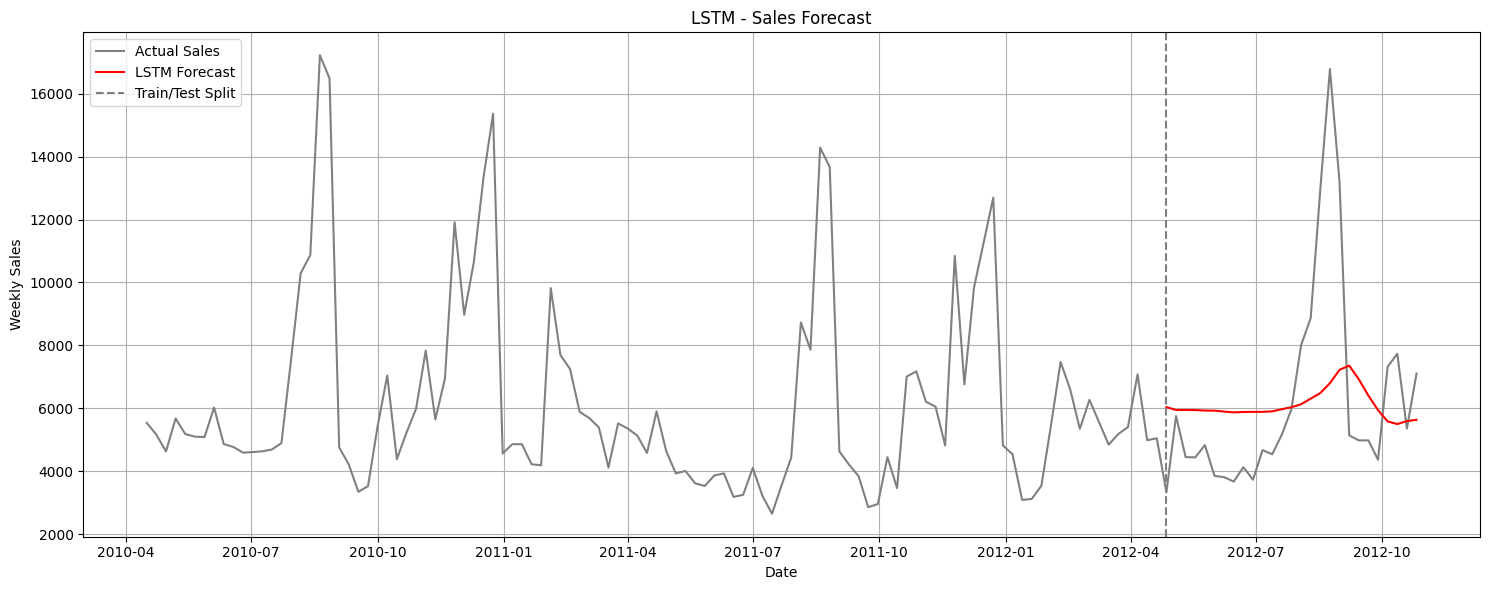

In [105]:
# 1. Recover original unscaled y values
true_y_unscaled = scaler.inverse_transform(y.reshape(-1, 1))  # full y series
y_test_unscaled = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))

# 2. Get date index aligned with df
# SEQ_LENGTH rows were lost due to sequence creation
# So valid target y values start from index SEQ_LENGTH
full_index = df.index[SEQ_LENGTH:]

# 3. Align test index to last portion of full_index
test_index = full_index[split:]

# 4. Plot
plt.figure(figsize=(15, 6))
plt.plot(full_index, true_y_unscaled, label='Actual Sales', color='grey')
plt.plot(test_index, pred_lstm, label='LSTM Forecast', color='red')

plt.axvline(x=test_index[0], color='gray', linestyle='--', label='Train/Test Split')
plt.title("LSTM - Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
prophet_df = df.reset_index()[['Date', 'y']]
prophet_df.rename(columns={'Date': 'ds', 'y': 'y'}, inplace=True)

model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_prophet.add_country_holidays(country_name='US')
model_prophet.fit(prophet_df)

future = model_prophet.make_future_dataframe(periods=len(test))
forecast = model_prophet.predict(future)
pred_prophet = forecast.iloc[-len(test):]['yhat']

# Evaluate
mae_prophet = mean_absolute_error(test['y'], pred_prophet)
rmse_prophet = np.sqrt(mean_squared_error(test['y'], pred_prophet))
print(f"Prophet - MAE: {mae_prophet:.2f}, RMSE: {rmse_prophet:.2f}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h5euoq4/9dqpc1dz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h5euoq4/t1xzc2t3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8225', 'data', 'file=/tmp/tmp7h5euoq4/9dqpc1dz.json', 'init=/tmp/tmp7h5euoq4/t1xzc2t3.json', 'output', 'file=/tmp/tmp7h5euoq4/prophet_modelf_jju6al/prophet_model-20250626070439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet - MAE: 3600.55, RMSE: 3968.07


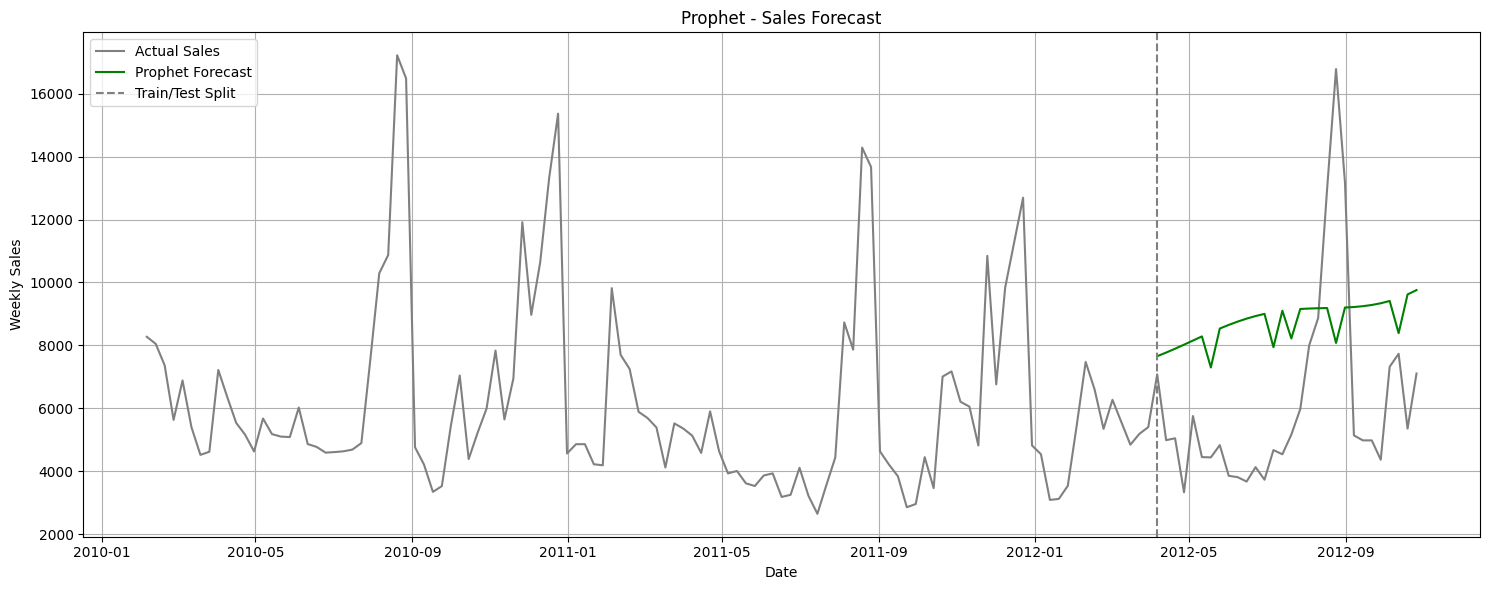

In [104]:
# Prophet predictions are already aligned with test period
# Make sure pred_prophet is a pandas Series and has correct index
pred_series = pd.Series(pred_prophet.values, index=test.index)

# Combine train + test actual values
full_actual = pd.concat([train['y'], test['y']])
full_index = full_actual.index

# Plot
plt.figure(figsize=(15, 6))
plt.plot(full_index, full_actual, label='Actual Sales', color='grey')
plt.plot(test.index, pred_series, label='Prophet Forecast', color='green')

# Vertical line at test split
plt.axvline(x=test.index[0], color='gray', linestyle='--', label='Train/Test Split')
plt.title("Prophet - Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
# Prepare data for CNN (same as LSTM)
scaler_cnn = MinMaxScaler()
scaled_data_cnn = scaler_cnn.fit_transform(df[['y']])

SEQ_LENGTH_CNN = 10
X_cnn, y_cnn = create_sequences(scaled_data_cnn, SEQ_LENGTH_CNN)
split_cnn = int(0.8 * len(X_cnn))
X_train_cnn, X_test_cnn = X_cnn[:split_cnn], X_cnn[split_cnn:]
y_train_cnn, y_test_cnn = y_cnn[:split_cnn], y_cnn[split_cnn:]

# Build CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))

model_cnn.compile(optimizer='adam', loss='mse')
model_cnn.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=32, verbose=0)

# Predict
pred_cnn = model_cnn.predict(X_test_cnn)
pred_cnn = scaler_cnn.inverse_transform(pred_cnn)

# Evaluate CNN
y_test_cnn_unscaled = scaler_cnn.inverse_transform(np.array(y_test_cnn).reshape(-1, 1))
mae_cnn = mean_absolute_error(y_test_cnn_unscaled, pred_cnn)
rmse_cnn = np.sqrt(mean_squared_error(y_test_cnn_unscaled, pred_cnn))
print(f"CNN - MAE: {mae_cnn:.2f}, RMSE: {rmse_cnn:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
CNN - MAE: 1545.88, RMSE: 2036.92


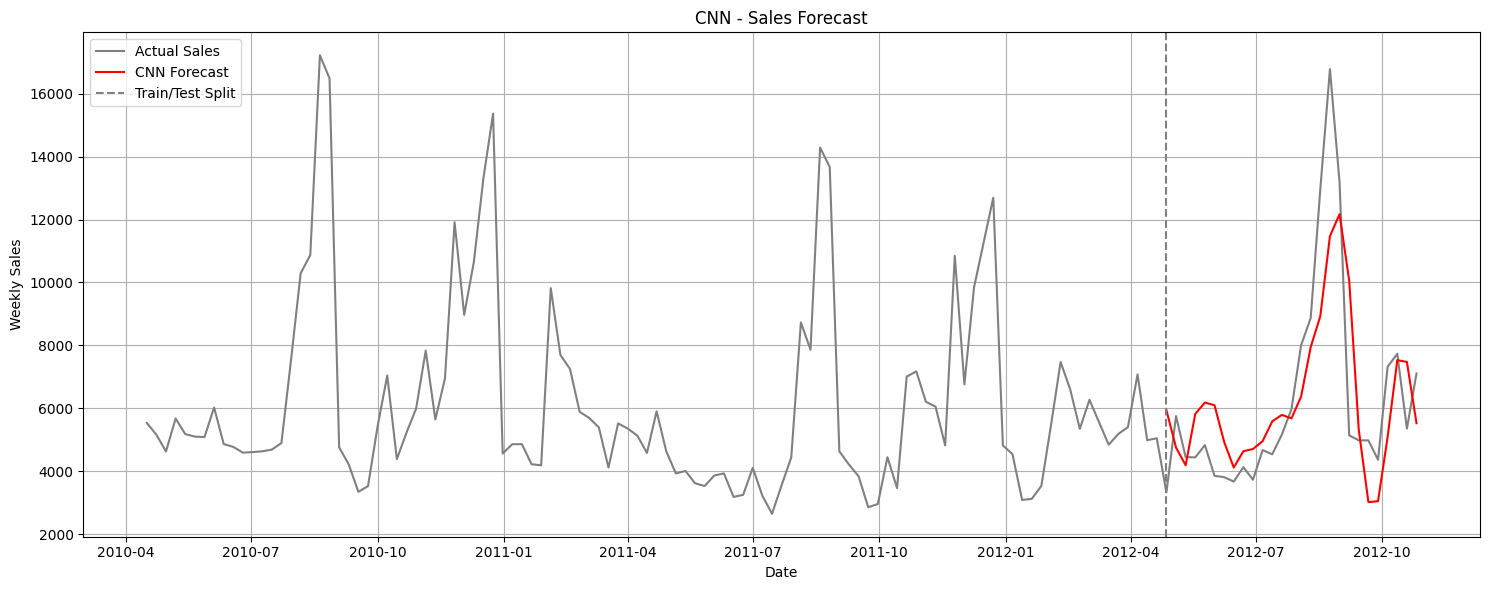

In [103]:
# Visualize CNN results
true_y_unscaled_cnn = scaler_cnn.inverse_transform(y_cnn.reshape(-1, 1))
full_index_cnn = df.index[SEQ_LENGTH_CNN:]
test_index_cnn = full_index_cnn[split_cnn:]

plt.figure(figsize=(15, 6))
plt.plot(full_index_cnn, true_y_unscaled_cnn, label='Actual Sales', color='grey')
plt.plot(test_index_cnn, pred_cnn, label='CNN Forecast', color='red')
plt.axvline(x=test_index_cnn[0], color='gray', linestyle='--', label='Train/Test Split')
plt.title("CNN - Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Final Comparison Table

In [111]:
results = pd.DataFrame({
    "Model": ["ARIMA", "SARIMA", "SARIMAX", "Holt-Winters", "Random Forest", "LSTM", "Prophet","CNN"],
    "MAE": [mae_arima, mae_sarima, mae_sarimax, mae_hw, mae_rf, mae_lstm, mae_prophet,mae_cnn],
    "RMSE": [rmse_arima, rmse_sarima, rmse_sarimax, rmse_hw, rmse_rf, rmse_lstm, rmse_prophet,rmse_cnn]
})

results.sort_values(by="RMSE").style.background_gradient(cmap='Blues')

,Model,MAE,RMSE
4,Random Forest,1330.020244,1945.401270
7,CNN,1545.883625,2036.921347
3,Holt-Winters,1439.964416,2209.412522
1,SARIMA,1834.447751,2549.707551
2,SARIMAX,2070.090028,2980.891804
0,ARIMA,2190.073757,3071.117969
6,Prophet,3600.548152,3968.072327
5,LSTM,6108.700960,6126.379139


In [113]:
#saving best model
joblib.dump(rf, 'sales_forecasting_final_model.pkl')

['sales_forecasting_final_model.pkl']